In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

columns = open('dataset/flag.fieldfile').read().strip().splitlines()
df = pd.read_csv('dataset/flag.data', header=None, names=columns)
df.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


Definiranje kontinuiranih i kategorickih varijabli

In [31]:
kontinuiraneVarijable = [
    "area", "population", "bars", "stripes", "colours",
    "circles", "crosses", "saltires", "quarters", "sunstars"
]

kategorickeVarijable = [
    "landmass", "zone", "language", "religion",
    "red", "green", "blue", "gold", "white",
    "black", "orange", "mainhue", "crescent", "triangle",
    "icon", "animate", "text", "topleft", "botright"
]

# 1. Kontrola kvalitete podataka
- Prepoznavanje nedostajućih vrijedn­osti
- Rekodiranje nedostajućih vrijednosti  npr  .null. -> „missing“

In [32]:
df[kontinuiraneVarijable] = df[kontinuiraneVarijable].fillna(-1)
df[kategorickeVarijable] = df[kategorickeVarijable].fillna("empty")

print(f'Missing values per column:\n{df.isnull().sum()}')

Missing values per column:
name          0
landmass      0
zone          0
area          0
population    0
language      0
religion      0
bars          0
stripes       0
colours       0
red           0
green         0
blue          0
gold          0
white         0
black         0
orange        0
mainhue       0
circles       0
crosses       0
saltires      0
quarters      0
sunstars      0
crescent      0
triangle      0
icon          0
animate       0
text          0
topleft       0
botright      0
dtype: int64


- Prepoznavanje uniformnih ili nelogičnih distribucija

In [33]:
# Deskriptivna statistika za kontinuirane varijable
df[kontinuiraneVarijable].describe()


,area,population,bars,stripes,colours,circles,crosses,saltires,quarters,sunstars
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,700.046392,23.268041,0.453608,1.551546,3.463918,0.170103,0.149485,0.092784,0.149485,1.386598
std,2170.927932,91.934085,1.038339,2.328005,1.300154,0.463075,0.385387,0.290879,0.435860,4.396186
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,111.000000,4.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,471.250000,14.000000,0.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,22402.000000,1008.000000,5.000000,14.000000,8.000000,4.000000,2.000000,1.000000,4.000000,50.000000


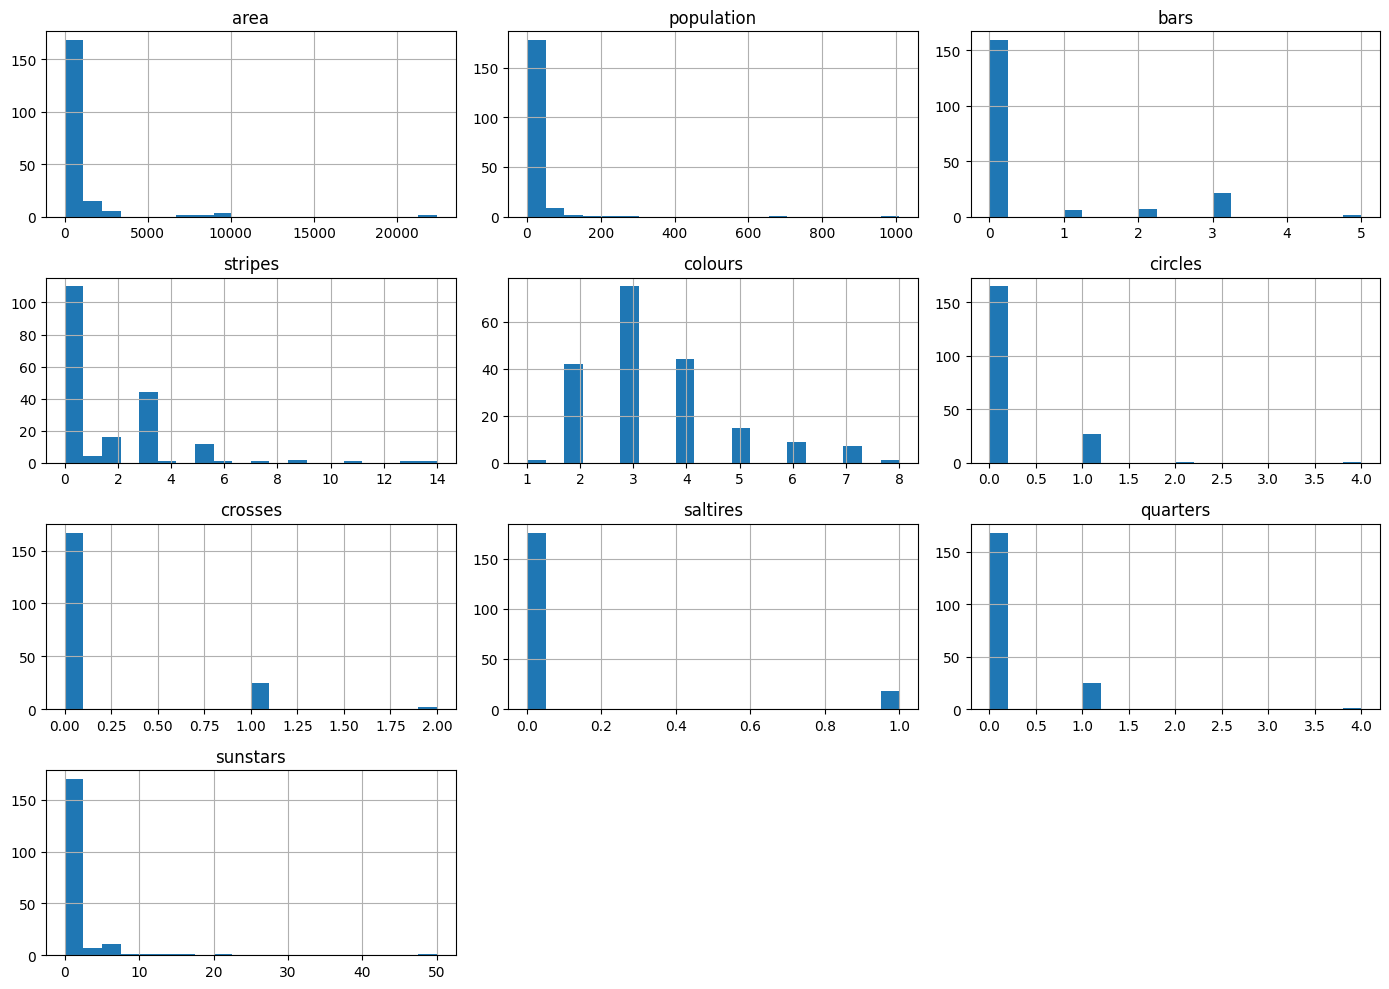

In [34]:
# Histogrami za kontinuirane varijable
df[kontinuiraneVarijable].hist(figsize=(14, 10), bins=20)
plt.tight_layout()
plt.show()



landmass
4    52
5    39
3    35
1    31
6    20
2    17
Name: count, dtype: int64



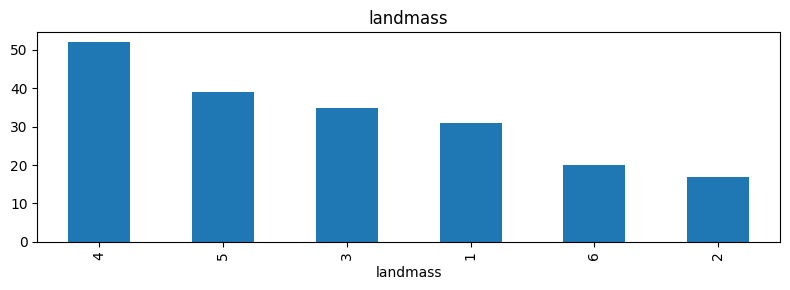


zone
1    91
4    58
2    29
3    16
Name: count, dtype: int64



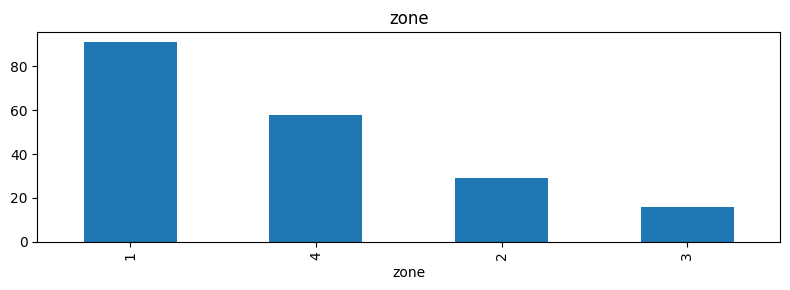


language
10    46
1     43
6     30
2     21
8     19
3     17
4      6
5      4
7      4
9      4
Name: count, dtype: int64



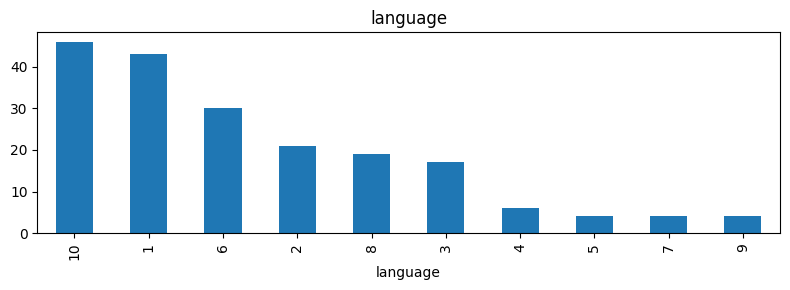


religion
1    60
0    40
2    36
5    27
6    15
3     8
4     4
7     4
Name: count, dtype: int64



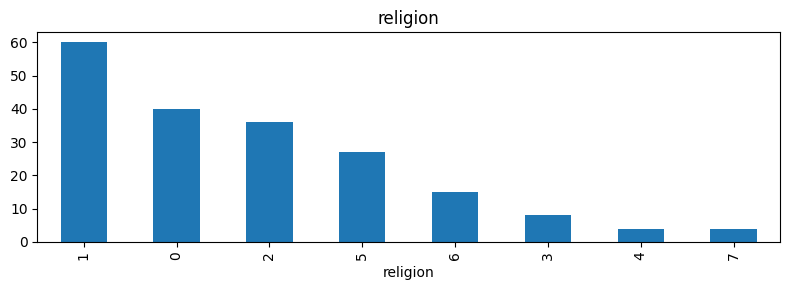


red
1    153
0     41
Name: count, dtype: int64



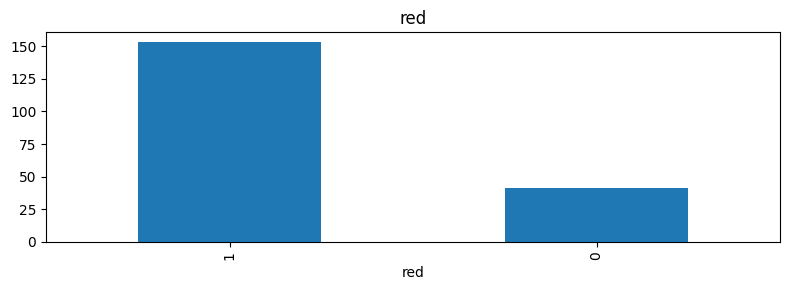


green
0    103
1     91
Name: count, dtype: int64



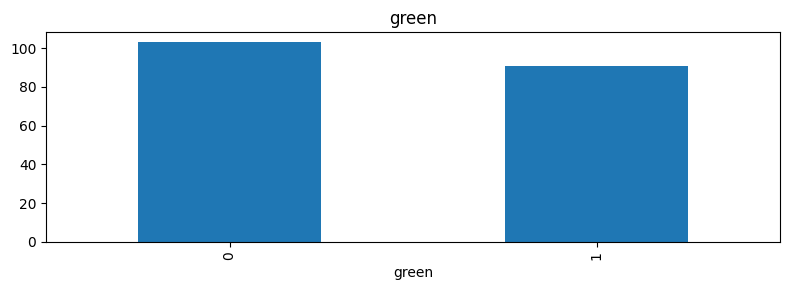


blue
1    99
0    95
Name: count, dtype: int64



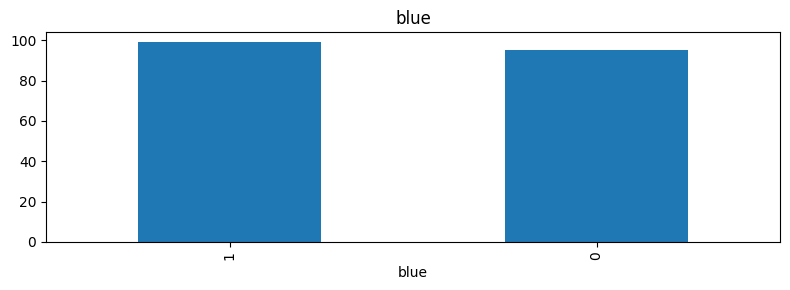


gold
0    103
1     91
Name: count, dtype: int64



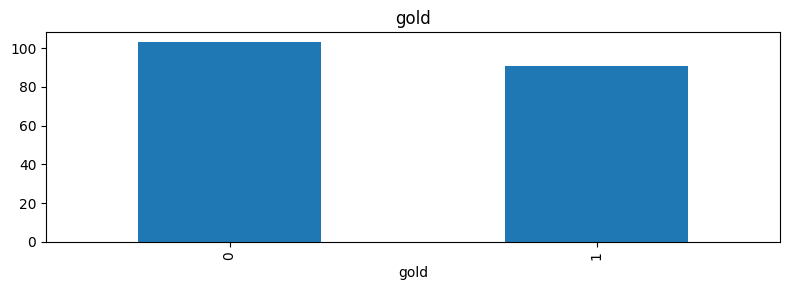


white
1    146
0     48
Name: count, dtype: int64



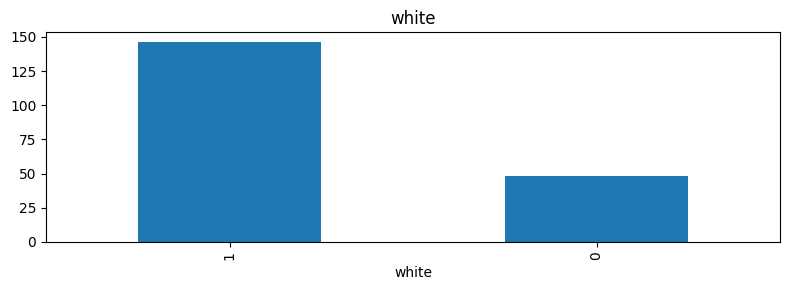


black
0    142
1     52
Name: count, dtype: int64



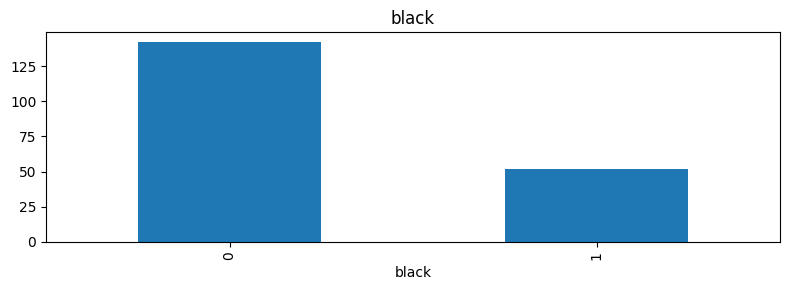


orange
0    168
1     26
Name: count, dtype: int64



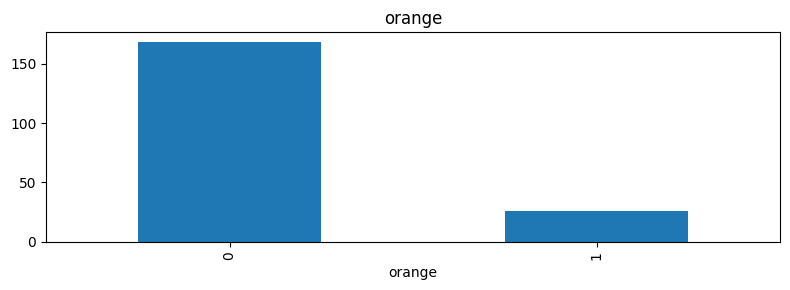


mainhue
red       71
blue      40
green     31
white     22
gold      19
black      5
orange     4
brown      2
Name: count, dtype: int64



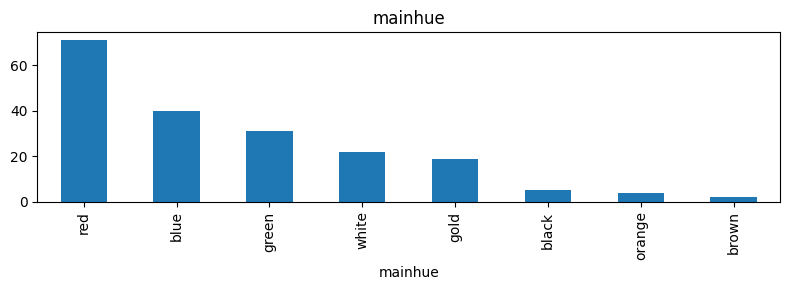


crescent
0    183
1     11
Name: count, dtype: int64



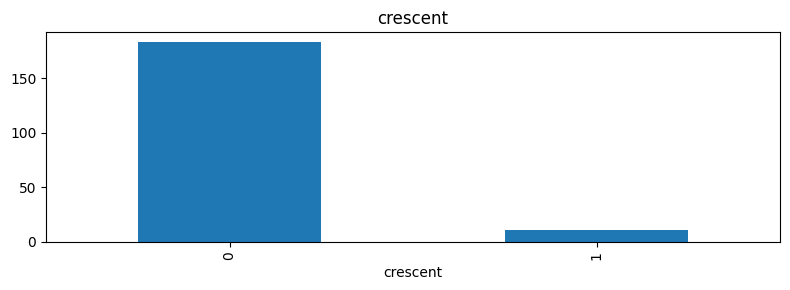


triangle
0    167
1     27
Name: count, dtype: int64



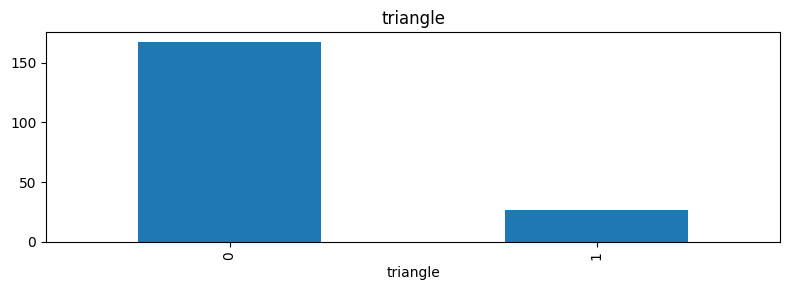


icon
0    145
1     49
Name: count, dtype: int64



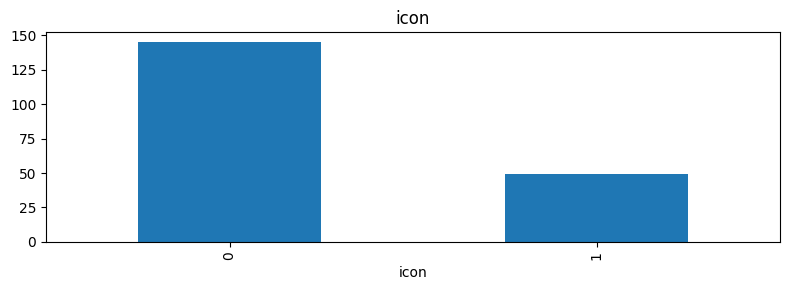


animate
0    155
1     39
Name: count, dtype: int64



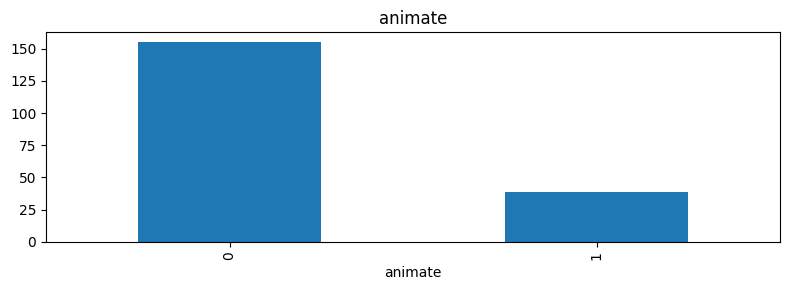


text
0    178
1     16
Name: count, dtype: int64



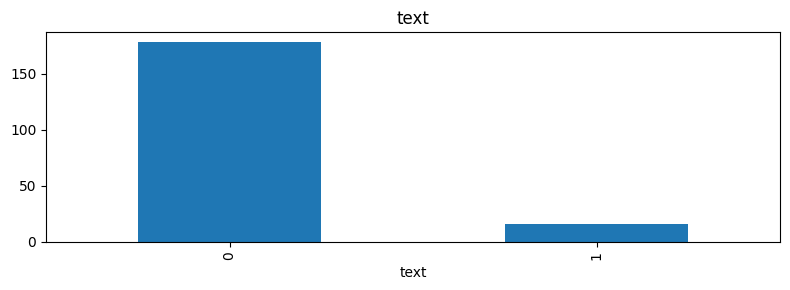


topleft
red       56
blue      43
white     41
green     32
black     12
gold       6
orange     4
Name: count, dtype: int64



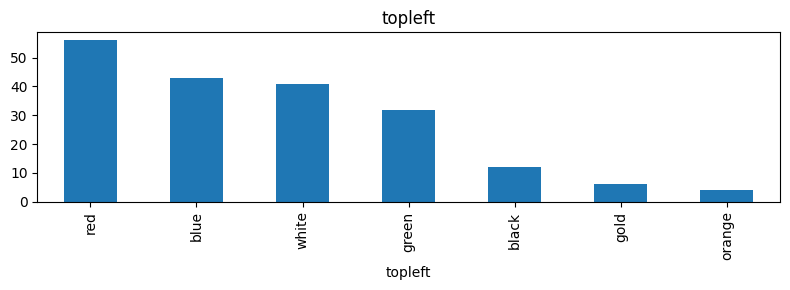


botright
red       69
blue      47
green     40
white     17
black      9
gold       9
brown      2
orange     1
Name: count, dtype: int64



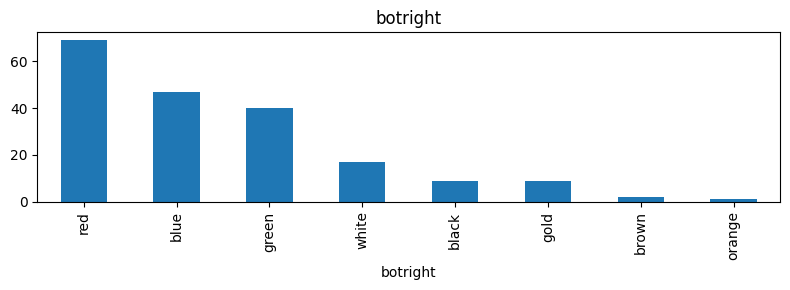

In [35]:
# Frekvencije i stupčasti grafikoni za kategoričke varijable
for col in kategorickeVarijable:
    counts = df[col].value_counts()
    print(f"\n{counts}\n")
    counts.plot(kind='bar', title=col, figsize=(8, 3))
    plt.tight_layout()
    plt.show()


- Provjeriti / redizajnirati /odrediti ciljnu varijablu i njenu kvalitetu


animate
0    155
1     39
Name: count, dtype: int64



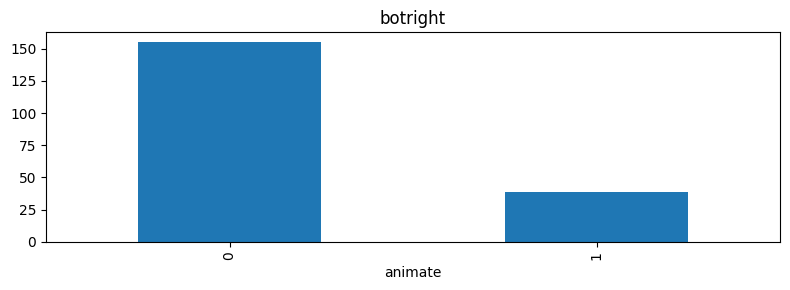

In [36]:
# Frekvencija i stupčasti grafikon za ciljnu varijablu animate if exists
counts = df["animate"].value_counts()
print(f"\n{counts}\n")
counts.plot(kind='bar', title=col, figsize=(8, 3))
plt.tight_layout()
plt.show()
# WIP

- Objasniti / komentirati nalaze
WIP

# 2. Statističke analize uzorka podataka

- Za svaku kategoričku varijablu prikazati distribucija frekvencije u grafu

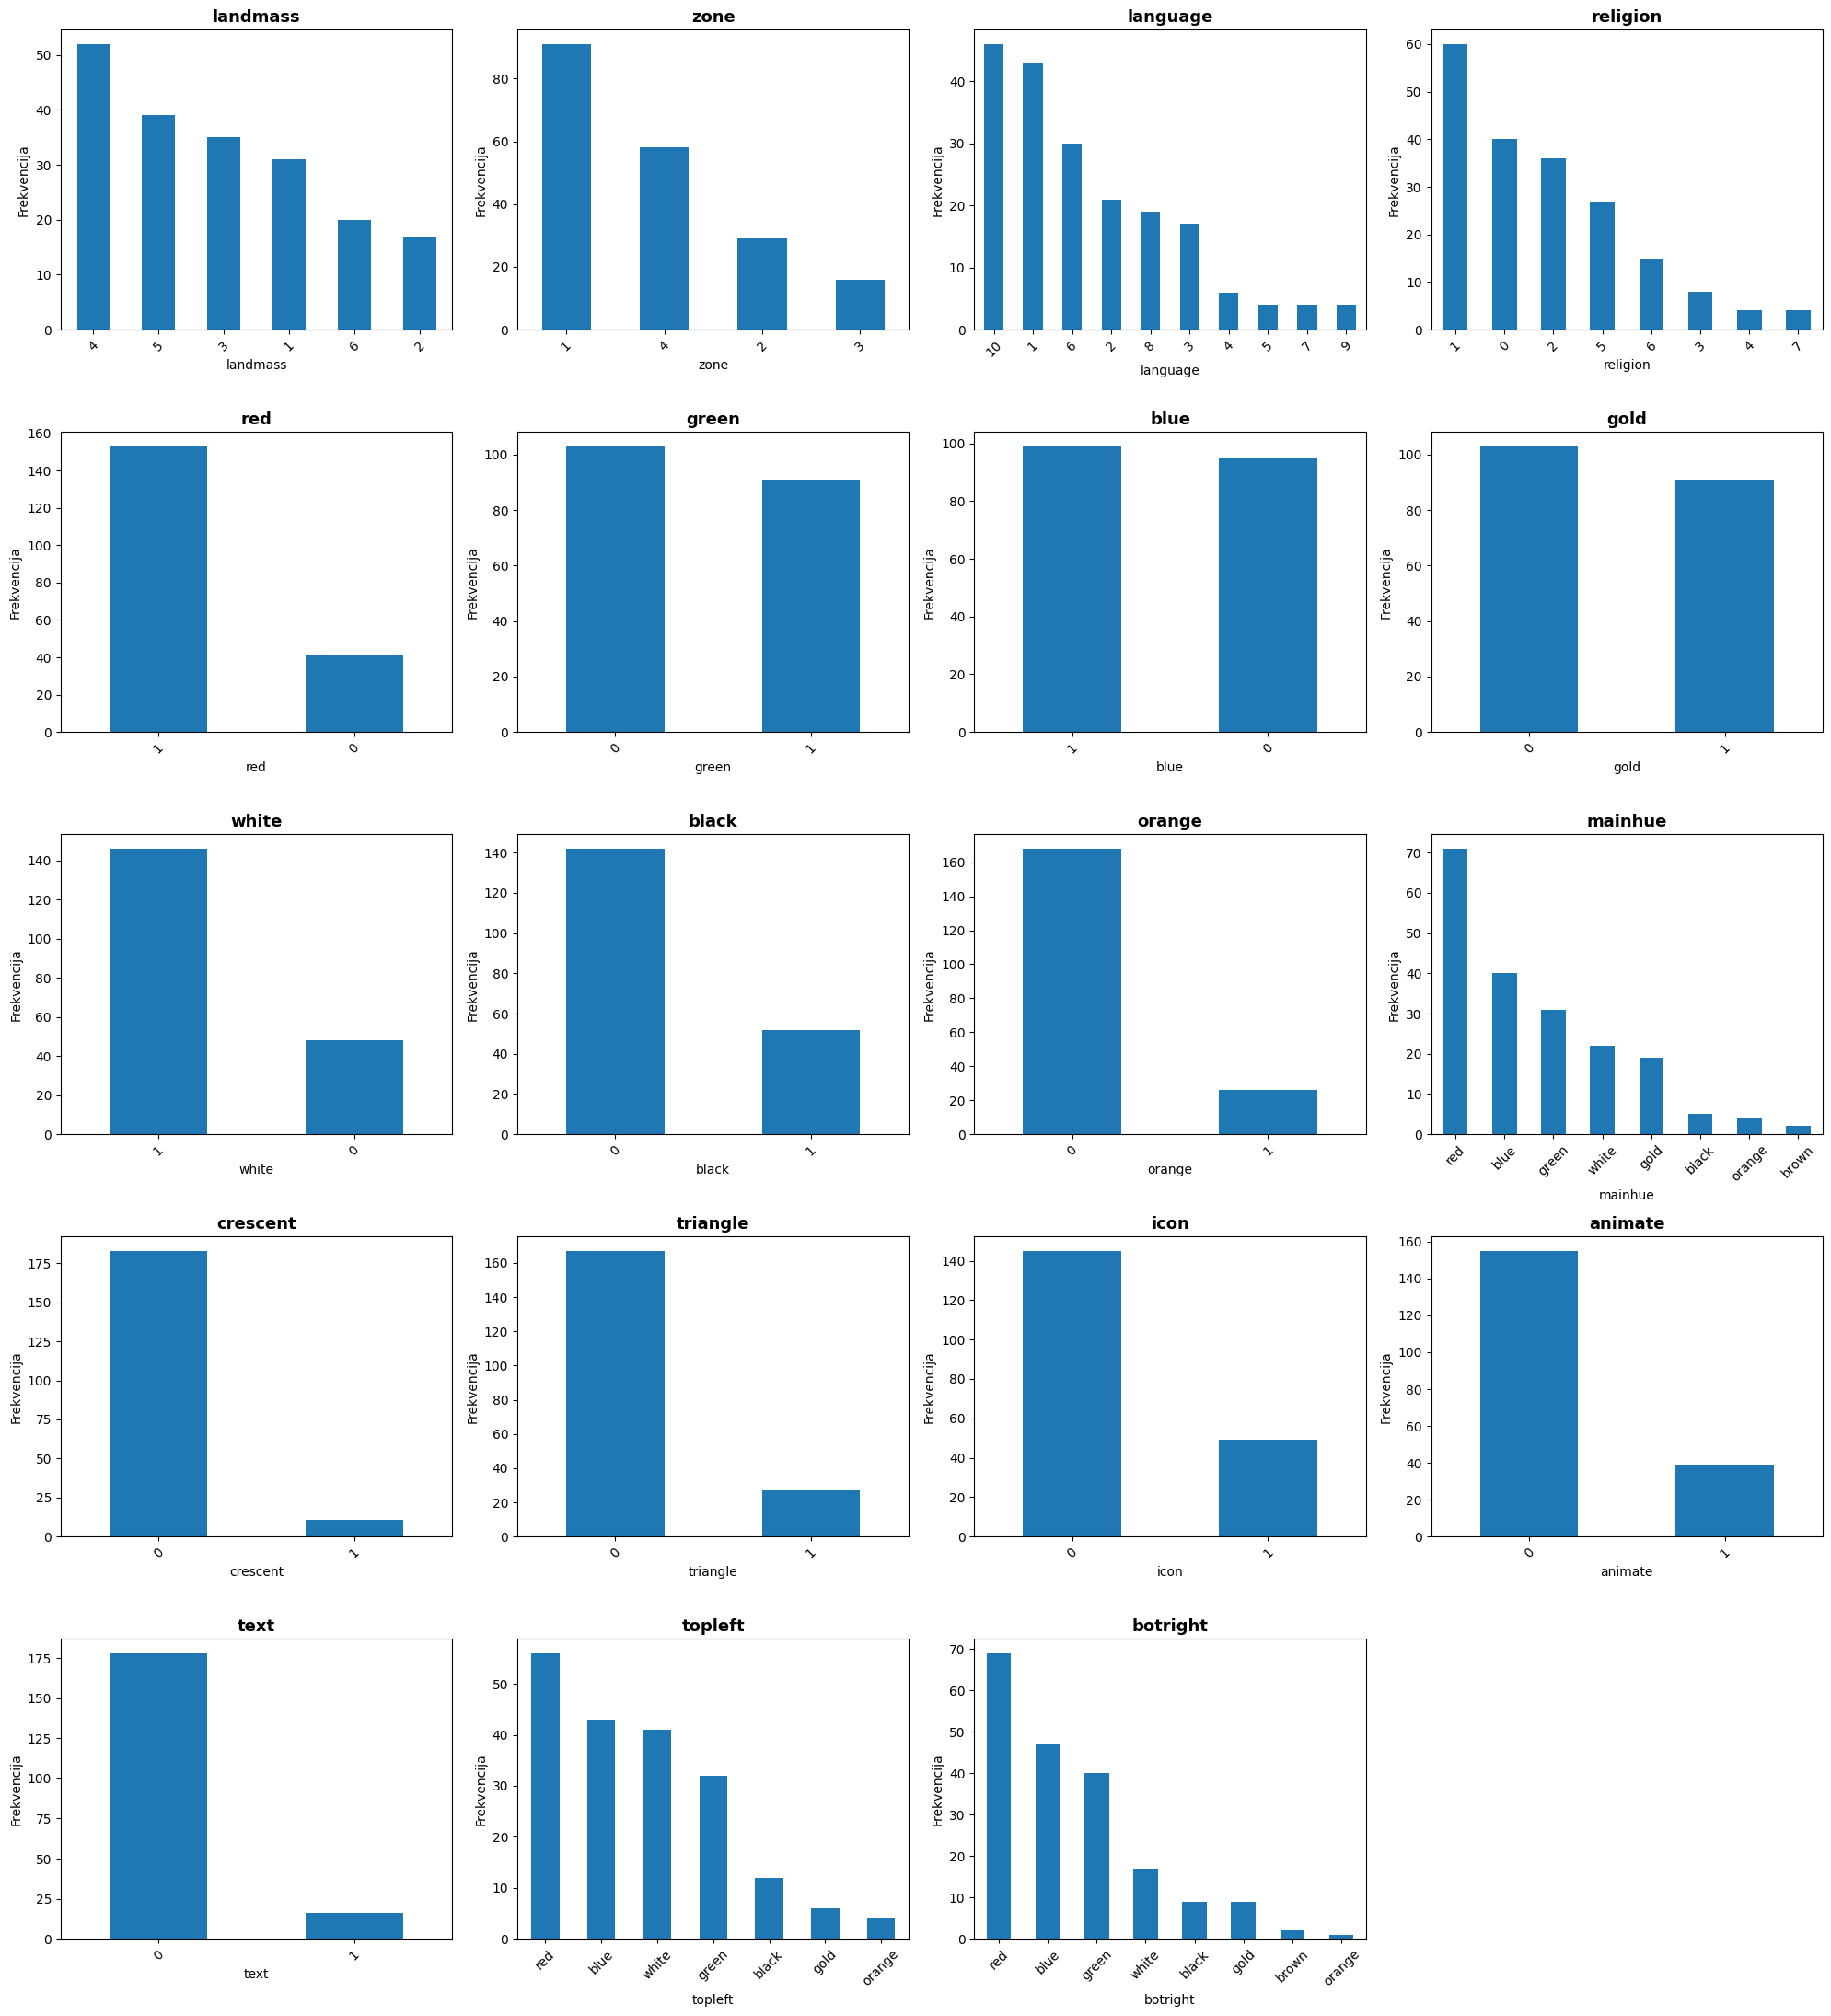

In [37]:
fig, axes = plt.subplots(5, 4, figsize=(20, 22))
axes = axes.flatten()

for i, col in enumerate(kategorickeVarijable):
    counts = df[col].value_counts()
    counts.plot(kind='bar', ax=axes[i])
    axes[i].set_title(col, fontsize=13, fontweight='bold')
    axes[i].set_ylabel('Frekvencija')
    axes[i].tick_params(axis='x', rotation=45)

# Sakrij prazan subplot
axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

- Za svaku kontinuiranu varijablu izračunati srednju vrijednost, z vrijednosti, zaobljenost distribucije, nagnutost distribucije

In [38]:
df_kont = df[kontinuiraneVarijable]

# Srednja vrijednost, nagnutost (skewness), zaobljenost (kurtosis)
statistike = pd.DataFrame({
    'Srednja vrijednost': df_kont.mean(),
    'Nagnutost (skewness)': df_kont.skew(),
    'Zaobljenost (kurtosis)': df_kont.kurtosis()
})

print(statistike.to_string())

# Z vrijednosti
z_scores = pd.DataFrame(stats.zscore(df_kont), columns=kontinuiraneVarijable, index=df.index)
print("\nZ vrijednosti (prvih 10 redova):")
z_scores.head(10)

            Srednja vrijednost  Nagnutost (skewness)  Zaobljenost (kurtosis)
area                700.046392              6.758367               56.454881
population           23.268041              8.569580               82.048208
bars                  0.453608              2.117213                3.194621
stripes               1.551546              2.315282                7.717630
colours               3.463918              1.087603                1.087557
circles               0.170103              4.055628               24.769352
crosses               0.149485              2.515006                5.825494
saltires              0.092784              2.829064                6.066037
quarters              0.149485              4.546618               31.458751
sunstars              1.386598              8.006025               80.506685

Z vrijednosti (prvih 10 redova):


,area,population,bars,stripes,colours,circles,crosses,saltires,quarters,sunstars
0,-0.024036,-0.079262,-0.437990,0.623796,1.184519,-0.368284,-0.388885,-0.319801,-0.343852,-0.088167
1,-0.309906,-0.221033,-0.437990,-0.668195,-0.357740,-0.368284,-0.388885,-0.319801,-0.343852,-0.088167
2,0.779538,-0.035640,1.493147,-0.668195,-0.357740,-0.368284,-0.388885,-0.319801,-0.343852,-0.088167
3,-0.323298,-0.253750,-0.437990,-0.668195,1.184519,-0.368284,-0.388885,-0.319801,-0.343852,-0.316225
4,-0.323298,-0.253750,2.458716,-0.668195,-0.357740,-0.368284,-0.388885,-0.319801,-0.343852,-0.316225
5,0.252596,-0.177411,-0.437990,0.193133,-0.357740,-0.368284,-0.388885,-0.319801,-0.343852,-0.088167
6,-0.323298,-0.253750,-0.437990,-0.237531,-0.357740,-0.368284,-0.388885,-0.319801,-0.343852,-0.316225
7,-0.323298,-0.253750,-0.437990,-0.237531,1.184519,-0.368284,-0.388885,-0.319801,-0.343852,-0.088167
8,0.959188,0.051604,-0.437990,0.623796,-1.128870,-0.368284,-0.388885,-0.319801,-0.343852,-0.316225
9,0.959188,0.051604,-0.437990,0.623796,-0.357740,-0.368284,-0.388885,-0.319801,-0.343852,-0.088167


- Izračunati korelacije svake varijable sa ciljnom varijablom

Korelacija svake varijable s ciljnom varijablom 'animate':

colours            0.544576
orange             0.482238
icon               0.448456
text               0.410678
gold               0.353249
green              0.250157
circles            0.205118
saltires           0.194235
black              0.161053
topleft_white      0.149888
crosses            0.139532
red                0.133648
zone               0.106034
quarters           0.093789
mainhue_black      0.080750
botright_brown     0.076137
mainhue_blue       0.062272
topleft_gold       0.058975
botright_red       0.057197
mainhue_gold       0.051079
white              0.049165
blue               0.028249
triangle           0.021261
topleft_red        0.021068
topleft_orange     0.017729
mainhue_orange     0.017729
botright_blue      0.016557
bars               0.016260
botright_black     0.011663
botright_gold      0.011663
sunstars           0.005640
religion          -0.002741
mainhue_green     -0.008142
topleft_black   

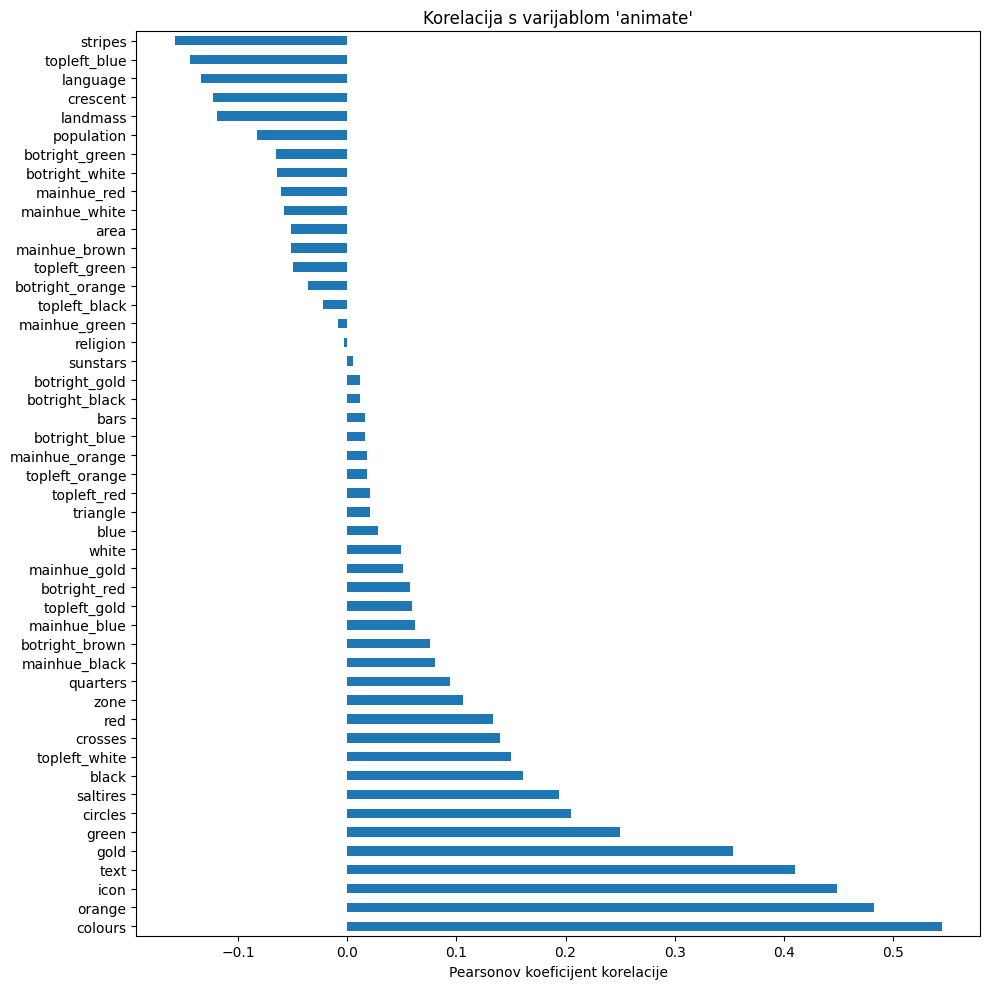

In [39]:
numeric_cols = df.select_dtypes(include='number').columns.drop('animate')
string_cols = ['mainhue', 'topleft', 'botright']

# One-hot encode string kategoricke varijable
dummies = pd.get_dummies(df[string_cols], prefix=string_cols)

# Spoji numericke i one-hot encoded stupce
all_features = pd.concat([df[numeric_cols], dummies], axis=1)

correlations = all_features.corrwith(df['animate']).sort_values(ascending=False)

print("Korelacija svake varijable s ciljnom varijablom 'animate':\n")
print(correlations.to_string())

correlations.plot(kind='barh', figsize=(10, 10), title="Korelacija s varijablom 'animate'")
plt.xlabel('Pearsonov koeficijent korelacije')
plt.tight_layout()
plt.show()

- Izračunati korelacije svake varijable izražene kroz Z vrijednost i kategorizirane u razrede <-3, (-3 do 3), >3 s ciljnom varijablom

Korelacija Z-razreda s varijablom 'animate':

crosses_>3            0.203469
saltires_>3           0.194235
colours_>3            0.143501
bars_>3               0.143501
stripes_-3 do 3       0.081587
circles_>3            0.076137
sunstars_-3 do 3      0.062865
population_-3 do 3    0.051195
quarters_-3 do 3      0.036107
area_-3 do 3          0.015318
area_>3              -0.015318
quarters_>3          -0.036107
population_>3        -0.051195
sunstars_>3          -0.062865
circles_-3 do 3      -0.076137
stripes_>3           -0.081587
bars_-3 do 3         -0.143501
colours_-3 do 3      -0.143501
saltires_-3 do 3     -0.194235
crosses_-3 do 3      -0.203469
area_<-3                   NaN
population_<-3             NaN
bars_<-3                   NaN
stripes_<-3                NaN
colours_<-3                NaN
circles_<-3                NaN
crosses_<-3                NaN
saltires_<-3               NaN
quarters_<-3               NaN
sunstars_<-3               NaN


/home/tpopovic/Documents/faks/NOSQL_BDA/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3023: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/tpopovic/Documents/faks/NOSQL_BDA/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3024: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


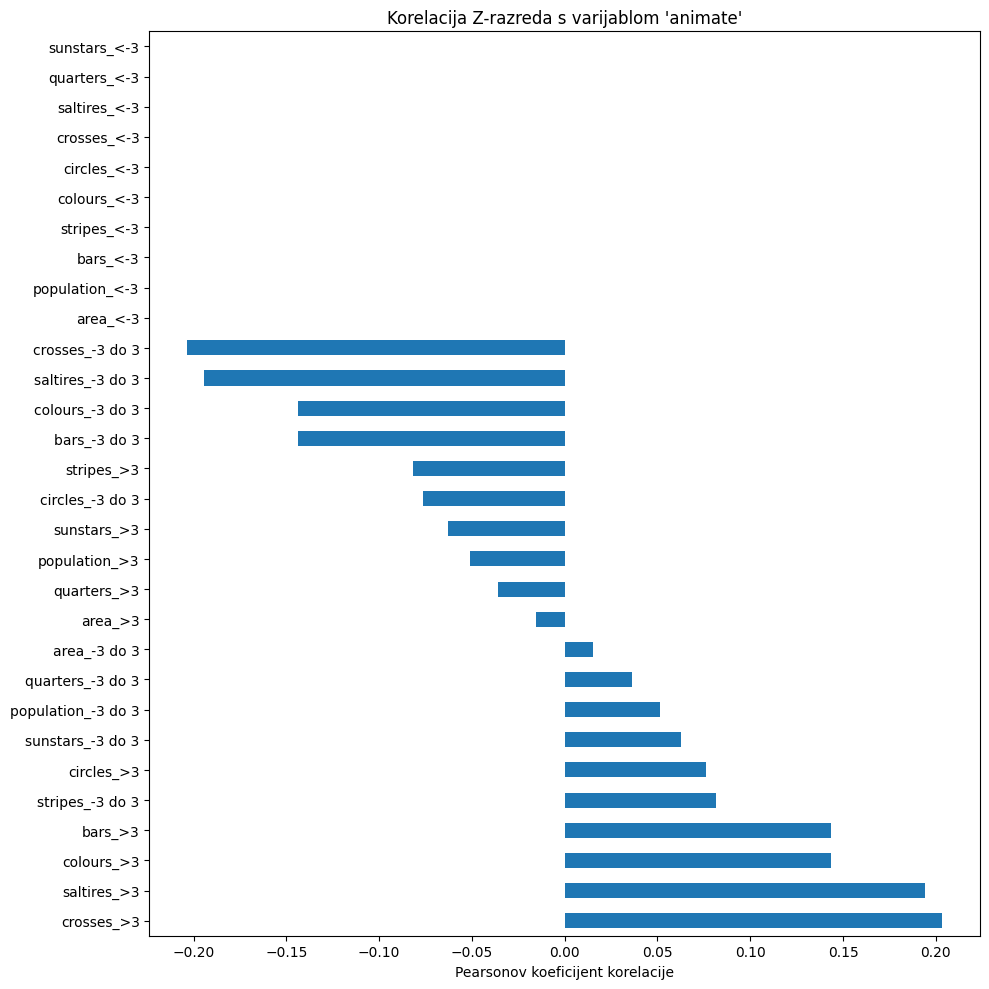

In [40]:
import numpy as np

# Z vrijednosti su vec izracunate u z_scores DataFrameu
# Kategorizacija u 3 razreda: <-3, (-3 do 3), >3
z_kategorije = z_scores.apply(lambda col: pd.cut(col, bins=[-np.inf, -3, 3, np.inf], labels=['<-3', '-3 do 3', '>3']))

# One-hot encode razrede
z_dummies = pd.get_dummies(z_kategorije, prefix=z_kategorije.columns)

# Korelacija s ciljnom varijablom
z_corr = z_dummies.corrwith(df['animate']).sort_values(ascending=False)

print("Korelacija Z-razreda s varijablom 'animate':\n")
print(z_corr.to_string())

z_corr.plot(kind='barh', figsize=(10, 10), title="Korelacija Z-razreda s varijablom 'animate'")
plt.xlabel('Pearsonov koeficijent korelacije')
plt.tight_layout()
plt.show()

# 3. IV, WoE izrazčuni

- Izračunati IV, WoE za svaku varijablu i prikazati u Jupyter Notebooku

In [ ]:
target = 'animate'

# Mapiranje numerickih kodova u smislene labele
df['landmass'] = df['landmass'].map({
    1: 'N.America', 2: 'S.America', 3: 'Europe', 4: 'Africa', 5: 'Asia', 6: 'Oceania'
})

df['zone'] = df['zone'].map({
    1: 'NE', 2: 'SE', 3: 'SW', 4: 'NW'
})

df['language'] = df['language'].map({
    1: 'English', 2: 'Spanish', 3: 'French', 4: 'German', 5: 'Slavic',
    6: 'Other Indo-Eur', 7: 'Chinese', 8: 'Arabic', 9: 'Jap/Turk/Fin/Mag', 10: 'Others'
})

df['religion'] = df['religion'].map({
    0: 'Catholic', 1: 'Other Christian', 2: 'Muslim', 3: 'Buddhist',
    4: 'Hindu', 5: 'Ethnic', 6: 'Marxist', 7: 'Others'
})

# Definiramo DA/NE ciljnu varijablu (1 = DA, 0 = NE)
df['ciljna'] = df[target].map({1: 'DA', 0: 'NE'})

def izracunaj_woe_iv(df, varijabla, ciljna='ciljna'):
    a = df[varijabla]
    b = df[ciljna]
    
    ct = pd.crosstab(a, b)
    
    # Ako nema oba stupca, varijabla nema smisla
    if 'DA' not in ct.columns or 'NE' not in ct.columns:
        return None, None
    
    ct = ct.apply(lambda c: c / c.sum(), axis=0)
    
    # Zamjena nula s malim brojem da izbjegnemo inf problem
    ct['DA'] = ct['DA'].replace(0, 0.0001)
    ct['NE'] = ct['NE'].replace(0, 0.0001)
    
    ct['WoE'] = np.log(ct['DA'] / ct['NE'])
    ct['IV'] = (ct['DA'] - ct['NE']) * ct['WoE']
    
    iv_ukupni = ct['IV'].sum()
    return ct, iv_ukupni


rezultati = []

for var in kategorickeVarijable:
    if var == target:   # Preskoci ciljnu varijabla
        continue
    ct, iv = izracunaj_woe_iv(df, var)
    if ct is not None:
        rezultati.append({'Varijabla': var, 'IV': round(iv, 4), 'Tip': 'Kategorička'})

# --- Kontinuirane varijable: prvo diskretiziramo (qcut u 8 bucketa), pa računamo ---
for var in kontinuiraneVarijable:
    try:
        df[var + '_kat'] = pd.qcut(df[var], q=8, duplicates='drop')
    except ValueError:
        df[var + '_kat'] = pd.cut(df[var], bins=8)
    
    ct, iv = izracunaj_woe_iv(df, var + '_kat')
    if ct is not None:
        rezultati.append({'Varijabla': var, 'IV': round(iv, 4), 'Tip': 'Kontinuirana (diskretizirana)'})

# --- Rezultat: DataFrame sortiran silazno po IV ---
df_iv = pd.DataFrame(rezultati).sort_values('IV', ascending=False).reset_index(drop=True)

# Opis prediktivnosti
def prediktivnost(iv):
    if iv < 0.02:
        return 'Varijabla nije korisna'
    elif iv < 0.1:
        return 'Slaba prediktivnost'
    elif iv < 0.3:
        return 'Srednja prediktivnost'
    elif iv < 0.5:
        return 'Jaka prediktivnost'
    else:
        return 'Super prediktivnost'

df_iv['Prediktivnost'] = df_iv['IV'].apply(prediktivnost)

print("=== Information Value (IV) za sve varijable ===\n")
print(df_iv.to_string(index=False))


=== Information Value (IV) za sve varijable ===

 Varijabla     IV                           Tip          Prediktivnost
   colours 2.2340 Kontinuirana (diskretizirana)    Super prediktivnost
  language 1.5275                   Kategorička    Super prediktivnost
    orange 1.1301                   Kategorička    Super prediktivnost
      icon 1.1070                   Kategorička    Super prediktivnost
      gold 0.8827                   Kategorička    Super prediktivnost
      text 0.7949                   Kategorička    Super prediktivnost
  religion 0.7742                   Kategorička    Super prediktivnost
  crescent 0.4705                   Kategorička     Jaka prediktivnost
     green 0.4090                   Kategorička     Jaka prediktivnost
  landmass 0.4026                   Kategorička     Jaka prediktivnost
      area 0.3949 Kontinuirana (diskretizirana)     Jaka prediktivnost
   crosses 0.3221 Kontinuirana (diskretizirana)     Jaka prediktivnost
   topleft 0.2656           

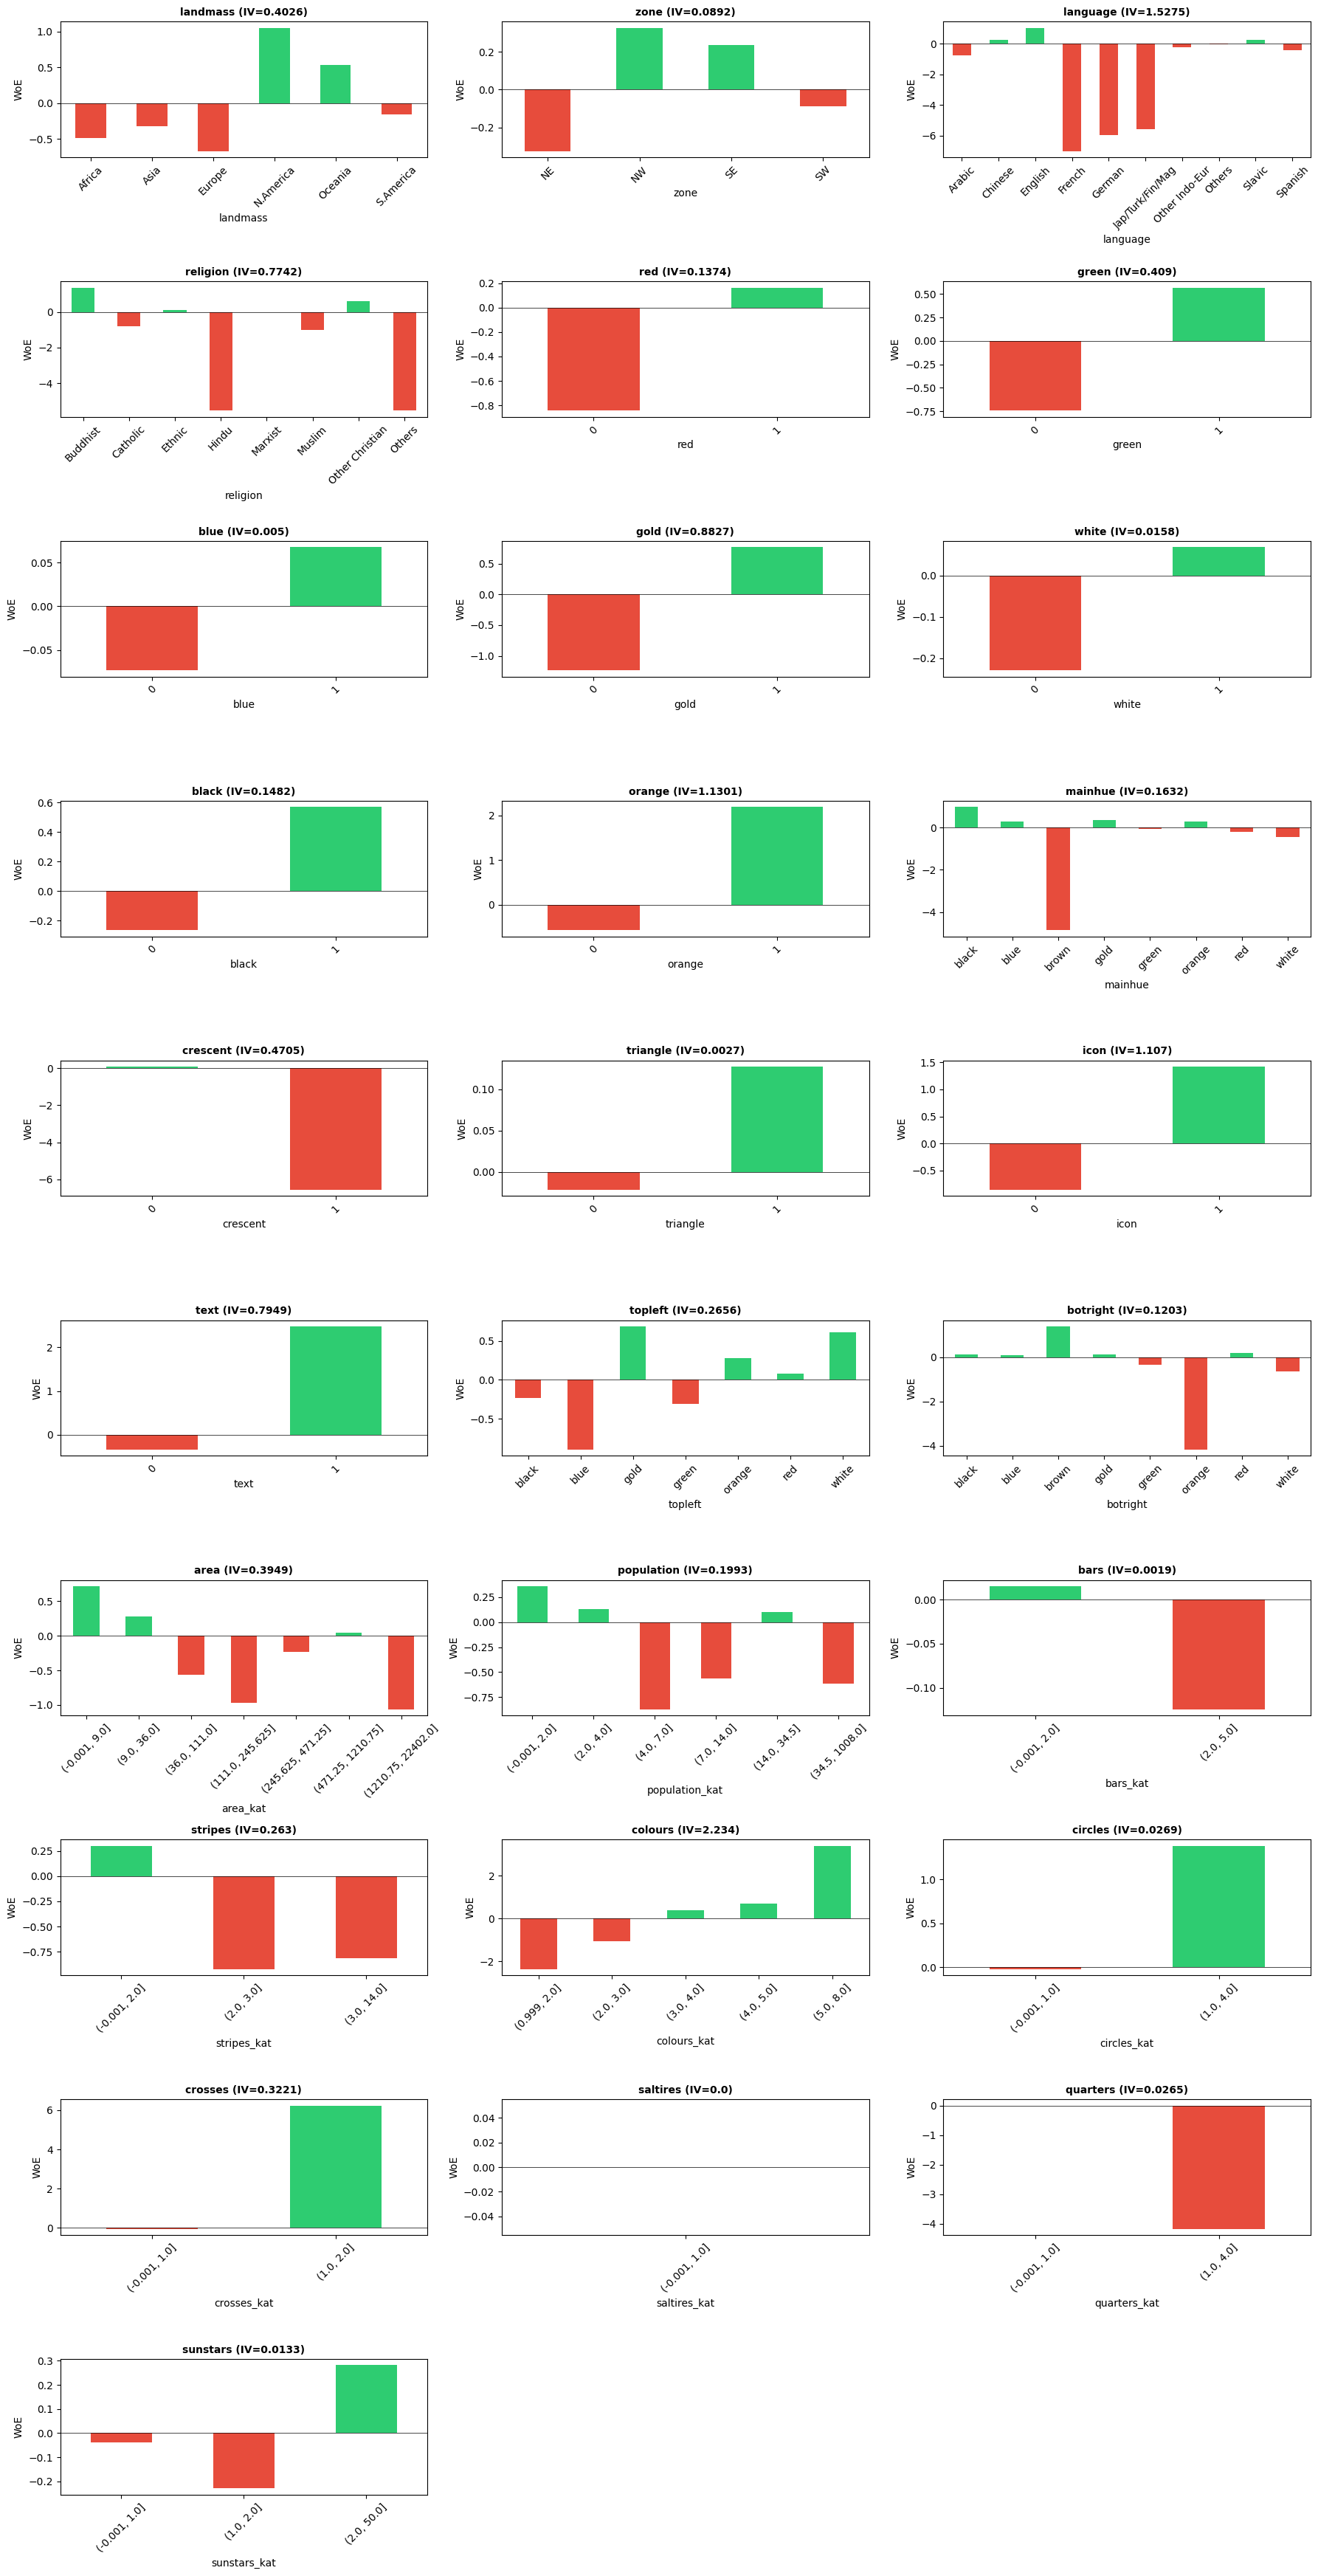

In [42]:
# Grafički prikaz WoE za svaku varijablu

# Filtriraj kategoričke bez ciljne varijable
kat_bez_ciljne = [v for v in kategorickeVarijable if v != target]

sve_varijable = kat_bez_ciljne + [v + '_kat' for v in kontinuiraneVarijable]
sve_nazivi = kat_bez_ciljne + kontinuiraneVarijable

n_cols = 3
n_rows = (len(sve_varijable) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 3.5))
axes = axes.flatten()

for i, (var, naziv) in enumerate(zip(sve_varijable, sve_nazivi)):
    ct, iv = izracunaj_woe_iv(df, var)
    if ct is not None:
        ct['WoE'].plot(kind='bar', ax=axes[i], color=['#e74c3c' if v < 0 else '#2ecc71' for v in ct['WoE']])
        axes[i].set_title(f'{naziv} (IV={round(iv, 4)})', fontsize=10, fontweight='bold')
        axes[i].set_ylabel('WoE')
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].axhline(y=0, color='black', linewidth=0.5)

# Sakrij prazne subplotove
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


- Izdvojiti varijable sa najjačim IV-om i prikazati grafički WoE graf za sve najjače varijable

=== Varijable s najjačim IV-om (>= 0.3) ===

Varijabla     IV                           Tip       Prediktivnost
  colours 2.2340 Kontinuirana (diskretizirana) Super prediktivnost
 language 1.5275                   Kategorička Super prediktivnost
   orange 1.1301                   Kategorička Super prediktivnost
     icon 1.1070                   Kategorička Super prediktivnost
     gold 0.8827                   Kategorička Super prediktivnost
     text 0.7949                   Kategorička Super prediktivnost
 religion 0.7742                   Kategorička Super prediktivnost
 crescent 0.4705                   Kategorička  Jaka prediktivnost
    green 0.4090                   Kategorička  Jaka prediktivnost
 landmass 0.4026                   Kategorička  Jaka prediktivnost
     area 0.3949 Kontinuirana (diskretizirana)  Jaka prediktivnost
  crosses 0.3221 Kontinuirana (diskretizirana)  Jaka prediktivnost


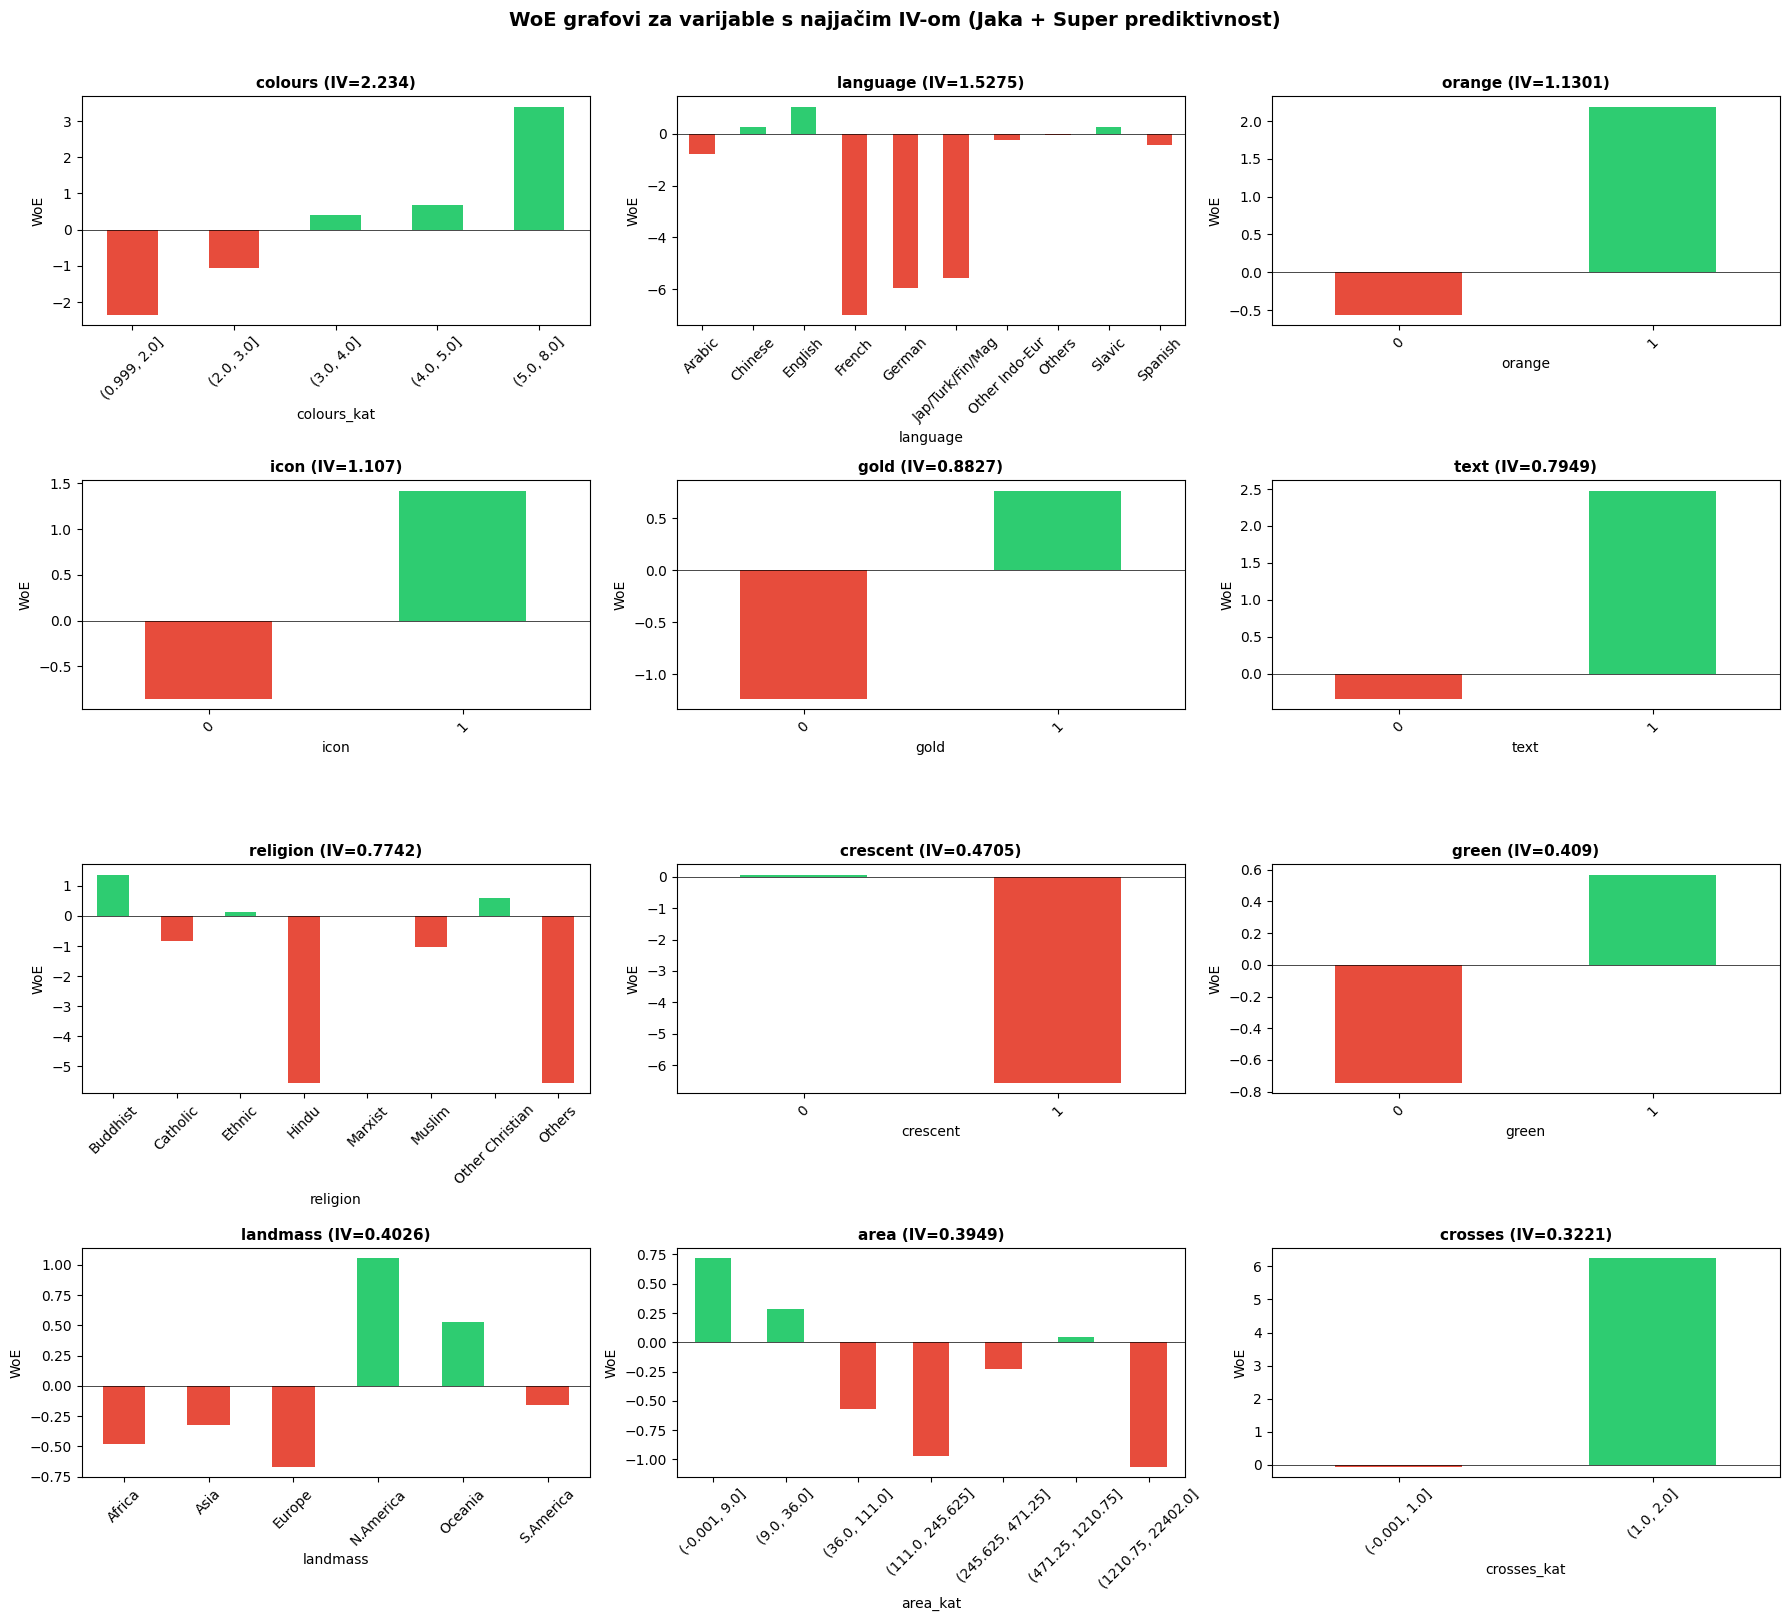

In [ ]:
# Izdvajamo samo varijable s jakom i super prediktivnoscu (IV >= 0.3)
najjace = df_iv[df_iv['IV'] >= 0.3]

print("Varijable s najjačim IV-om (>= 0.3):\n")
print(najjace.to_string(index=False))

# Za svaku najjacu varijablu odredimo naziv stupca u df-u (kategoricke direktno, kontinuirane s _kat)
najjace_stupci = []
for _, row in najjace.iterrows():
    if row['Tip'] == 'Kontinuirana (diskretizirana)':
        najjace_stupci.append((row['Varijabla'] + '_kat', row['Varijabla']))
    else:
        najjace_stupci.append((row['Varijabla'], row['Varijabla']))

n = len(najjace_stupci)
n_cols = 3
n_rows = (n + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for i, (var, naziv) in enumerate(najjace_stupci):
    ct, iv = izracunaj_woe_iv(df, var)
    if ct is not None:
        ct['WoE'].plot(kind='bar', ax=axes[i], color=['#e74c3c' if v < 0 else '#2ecc71' for v in ct['WoE']])
        axes[i].set_title(f'{naziv} (IV={round(iv, 4)})', fontsize=11, fontweight='bold')
        axes[i].set_ylabel('WoE')
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].axhline(y=0, color='black', linewidth=0.5)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle('WoE grafovi za varijable s najjačim IV-om (Jaka + Super prediktivnost)', fontsize=14, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()

- Grupirati razrede po kriteriju WoE za najjače varijable

Kategorije svake varijable grupiramo u 3 razreda prema WoE vrijednosti:
- WoE < 0 - kategorije koje ukazuju na NE (animate=0)
- WoE ~= 0 - neodređene kategorije
- WoE > 0 - kategorije koje ukazuju na DA (animate=1)

In [44]:
# Grupiranje razreda po WoE kriteriju za najjace varijable
# Prag za "neodredeno": WoE izmedu -0.5 i 0.5

prag = 0.5

for var, naziv in najjace_stupci:
    ct, iv = izracunaj_woe_iv(df, var)
    if ct is None:
        continue
    
    # Grupiranje kategorija prema WoE
    grupe = {
        'NE (WoE < -{})'.format(prag): [],
        'Neodređeno (|WoE| <= {})'.format(prag): [],
        'DA (WoE > {})'.format(prag): []
    }
    
    for kategorija, woe in ct['WoE'].items():
        kat_str = str(kategorija)
        if woe < -prag:
            grupe['NE (WoE < -{})'.format(prag)].append(kat_str)
        elif woe > prag:
            grupe['DA (WoE > {})'.format(prag)].append(kat_str)
        else:
            grupe['Neodređeno (|WoE| <= {})'.format(prag)].append(kat_str)
    
    print(f"{'='*60}")
    print(f"  {naziv} (IV = {round(iv, 4)})")
    print(f"{'='*60}")
    for grupa, kategorije in grupe.items():
        if kategorije:
            print(f"  {grupa}:")
            print(f"    {', '.join(kategorije)}")
    print()


  colours (IV = 2.234)
  NE (WoE < -0.5):
    (0.999, 2.0], (2.0, 3.0]
  Neodređeno (|WoE| <= 0.5):
    (3.0, 4.0]
  DA (WoE > 0.5):
    (4.0, 5.0], (5.0, 8.0]

  language (IV = 1.5275)
  NE (WoE < -0.5):
    Arabic, French, German, Jap/Turk/Fin/Mag
  Neodređeno (|WoE| <= 0.5):
    Chinese, Other Indo-Eur, Others, Slavic, Spanish
  DA (WoE > 0.5):
    English

  orange (IV = 1.1301)
  NE (WoE < -0.5):
    0
  DA (WoE > 0.5):
    1

  icon (IV = 1.107)
  NE (WoE < -0.5):
    0
  DA (WoE > 0.5):
    1

  gold (IV = 0.8827)
  NE (WoE < -0.5):
    0
  DA (WoE > 0.5):
    1

  text (IV = 0.7949)
  Neodređeno (|WoE| <= 0.5):
    0
  DA (WoE > 0.5):
    1

  religion (IV = 0.7742)
  NE (WoE < -0.5):
    Catholic, Hindu, Muslim, Others
  Neodređeno (|WoE| <= 0.5):
    Ethnic, Marxist
  DA (WoE > 0.5):
    Buddhist, Other Christian

  crescent (IV = 0.4705)
  NE (WoE < -0.5):
    1
  Neodređeno (|WoE| <= 0.5):
    0

  green (IV = 0.409)
  NE (WoE < -0.5):
    0
  DA (WoE > 0.5):
    1

  landm